<a href="https://colab.research.google.com/github/Varshitha-kommuri/SENTIMENT-ANALYSIS-OF-RESTAURANT-REVIEWS/blob/main/RANDOM_FOREST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
df = pd.read_csv('Restaurant_Reviews.tsv', sep='\t')
x = df.drop('Liked',axis=1)
print(x.shape)
x.head()
#Getting the dependent feature.
y = df['Liked']
print(y.shape)  #(1000,)
y.head()
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
#DATA PREPROCESSING

ps = PorterStemmer()
corpus = []

for i in range(0,len(df)):

  #Substituting any other other character other than A-Z or a-z with ' '.
  review = re.sub('[^A-Za-z]',' ',df['Review'][i])

  #Converting all the words into lowercase.
  review = review.lower()

  #Splitting the words.
  review = review.split()

  #If the word doesnot belong to the stopwords, then add it into review.
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

  #Joining the words after stemming.
  review = ' '.join(review)

  #Appending the review to corpus list.
  corpus.append(review)

from sklearn.feature_extraction.text import CountVectorizer
#Applying CountVectorizer.
# Creating the bag of words model.

#From all the words take the most frequent 5000 words and take combination of 1,2,3 words.
cv = CountVectorizer(max_features = 5000, ngram_range=(1,3))
x = cv.fit_transform(corpus).toarray()



(1000, 1)
(1000,)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Train test splitting of data.

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

 #Train test splitting of data.
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size = 0.3)

 # Define the hyperparameter grid with only 'n_estimators'
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500]  # Values to search for 'n_estimators'
}
 # Create the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
 # Create GridSearchCV object
grid_search = GridSearchCV(
    rf_classifier,  # Classifier
    param_grid=param_grid,  # Hyperparameter grid with 'n_estimators'
)
 # Fit the grid search to data
grid_search.fit(X_train, Y_train)
 # Print the best 'n_estimators' value found by GridSearchCV
print("Best 'n_estimators' Value:", grid_search.best_params_['n_estimators'])
 # Access the best model
best_rf_model = grid_search.best_estimator_
 # Evaluate the best model on test data
best_rf_model.fit(X_train, Y_train)
pred =best_rf_model.predict(X_test)
test_accuracy = metrics.accuracy_score(Y_test,pred)
print("Test Accuracy: {}%".format(round(test_accuracy*100,2)))

Best 'n_estimators' Value: 200
Test Accuracy: 70.0%


In [ ]:
# Evaluate the best model on test data
best_rf_model.fit(X_train, Y_train)
pred =best_rf_model.predict(X_test)
score1 = metrics.accuracy_score(Y_test,pred)
score2 = metrics.precision_score(Y_test,pred)
score3 = metrics.recall_score(Y_test,pred)
score4 = (2*score2*score3)/(score2+score3)
print("Accuracy score is : {}%".format(round(score1*100,2)))
print("Precision score is: {}%".format(round(score2*100,2)))
print("Recall score is: {}%".format(round(score3*100,2)))
print("F1 score is: {}%".format(round(score4*100,2)))


Accuracy score is : 70.0%
Precision score is: 76.58%
Recall score is: 57.05%
F1 score is: 65.38%


Confusion matrix , without normalization


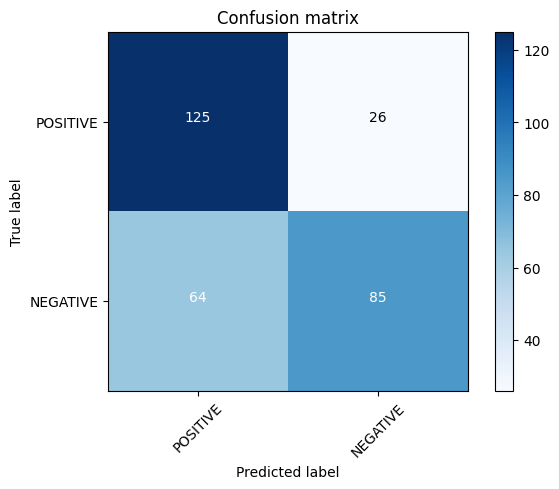

In [ ]:
# Plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import itertools
def plot_confusion_matrix(cm,classes,normalize=False,title = 'Confusion matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation = 45)
  plt.yticks(tick_marks,classes)

  if normalize:
    cm= cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matix")
  else:
    print("Confusion matrix , without normalization")
  thresh = cm.max()/2.0
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment="center",color="white" if cm[i,j] >thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
cm = metrics.confusion_matrix(Y_test,pred)
plot_confusion_matrix(cm,classes=['POSITIVE','NEGATIVE'])

In [ ]:
def predict_sample(sample):
 #Substituting any other other character other than A-Z or a-z with ' '.
  review = re.sub('[^A-Za-z]',' ',string = sample)

  #Converting all the words into lowercase.
  review = review.lower()

  #Splitting the words.
  review = review.split()

  #If the word doesnot belong to the stopwords, then add it into review.
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]

  #Joining the words after stemming.
  review = ' '.join(review)
  temp= cv.transform([review]).toarray()
  return best_rf_model.predict(temp)

In [ ]:
sample = "The flavour and texture of food was really worst, my apettite was instantly gone"
if(predict_sample(sample)):
  print(sample + " - It is a positive review")
else:
  print(sample+ " - It is a negative review")

sample = "The service was great,liked the salads"
if(predict_sample(sample)):
  print(sample + " - It is a positive review")
else:
  print(sample+ " - It is a negative review")

The flavour and texture of food was really worst, my apettite was instantly gone - It is a negative review
The service was great,liked the salads - It is a positive review
